God 0


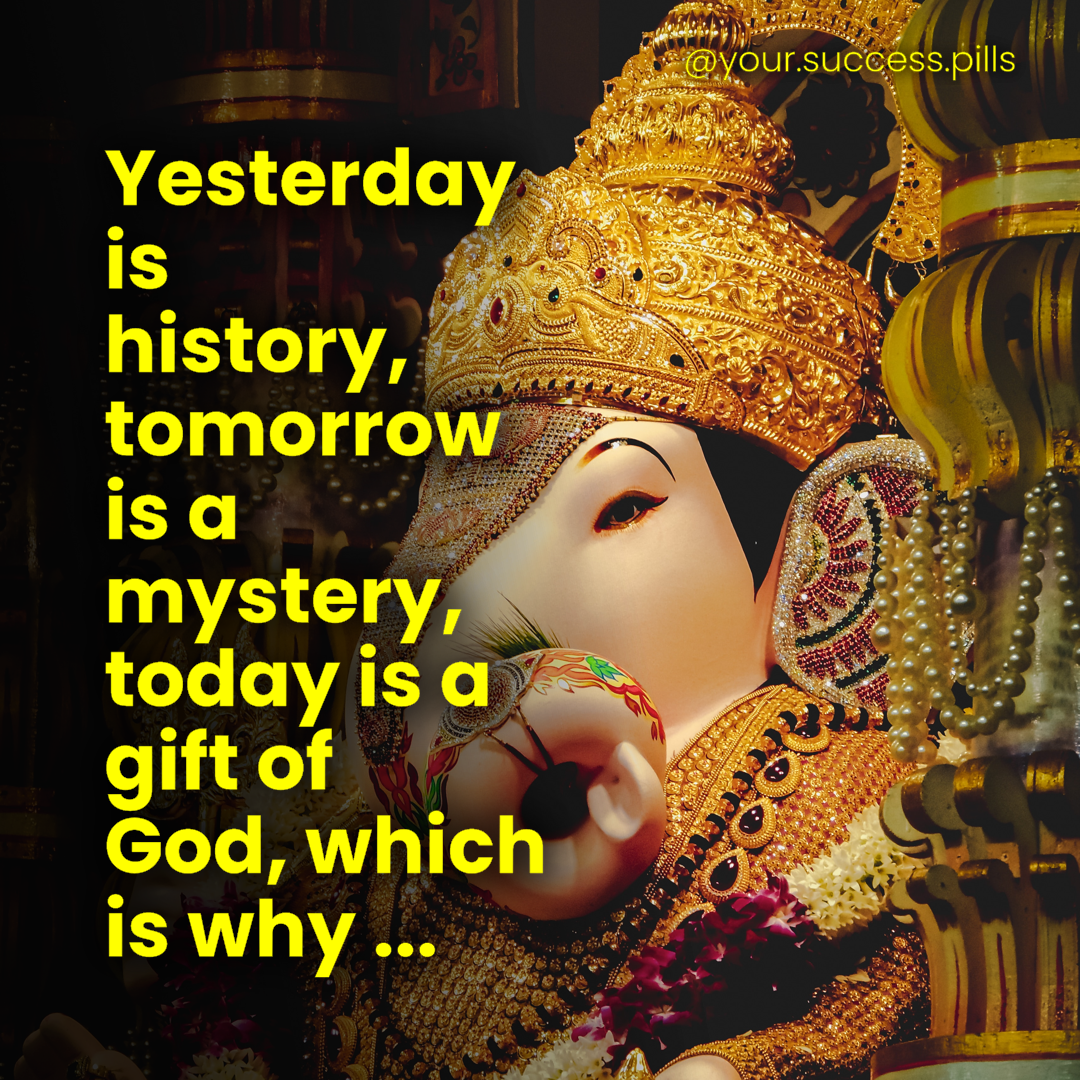

In [1]:
import requests
from PIL import Image
from quote import quote
from src.image.crop import crop
from src.image.draw import resize_img
from src.image.extract import ApiImgExtractor
from src.image.merge import merge_text_to_image
from src.paths import LOCAL_PROCESSED_DATA_PATH

themes = ['God'
#           , 'Einstein', 'Travel', 'Motivation', 'Religion'
         ]
format_ = "PNG"
n = 1 # amount of quotes per theme
for t in themes:
    api = ApiImgExtractor('unsplash')
    quotes = quote(t, limit=n)
    api.query(_search_params={
        'q': t,
        'imgType': 'photos'
    })
    for i, (q, img_url) in enumerate(zip(quotes, api.img_urls)):
        print(t, i)
        if not q or not img_url:
            break
        filepath = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.{format_}"
        img = crop(img_url, export=False, output_size=(1080,1080))
        txt = q['quote']
        post = merge_text_to_image(img, txt, top_right_txt="@your.success.pills", txt_aspect_ratio=.4, txt_brightness=3)
        post.save(filepath, format_, quality=90)
post